<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [20]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [21]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [22]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [23]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [24]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


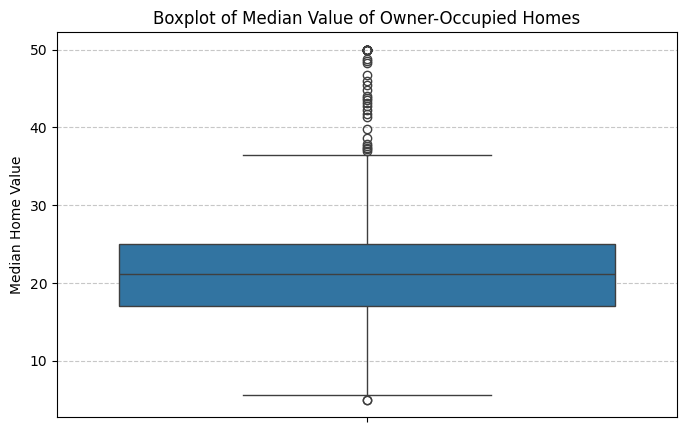

In [26]:
pyplot.figure(figsize=(8, 5))
sns.boxplot(y=boston_df["MEDV"])

pyplot.title("Boxplot of Median Value of Owner-Occupied Homes")
pyplot.ylabel("Median Home Value")
pyplot.grid(axis="y", linestyle="--", alpha=0.7)


pyplot.show()

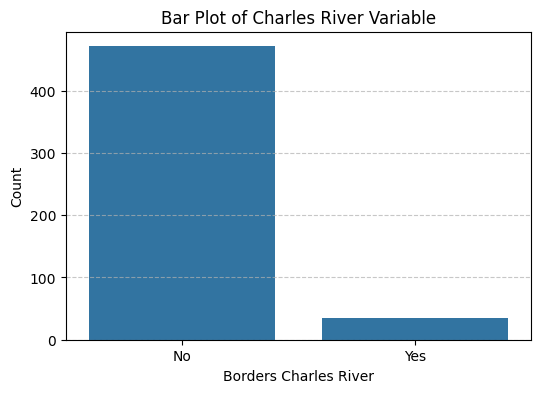

In [27]:
value_counts = boston_df["CHAS"].value_counts()


pyplot.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)


pyplot.xticks([0, 1], ["No", "Yes"]) 
pyplot.xlabel("Borders Charles River")
pyplot.ylabel("Count")
pyplot.title("Bar Plot of Charles River Variable")
pyplot.grid(axis="y", linestyle="--", alpha=0.7)

pyplot.show()

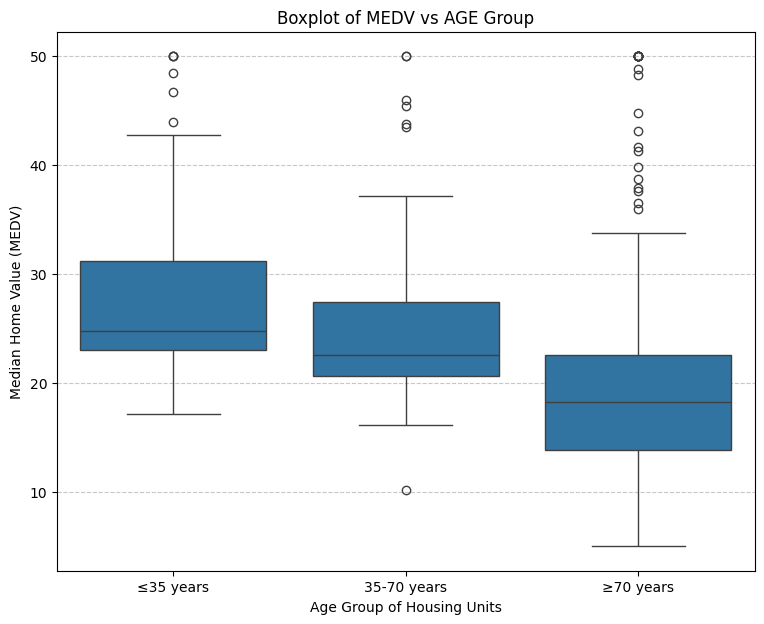

In [28]:
medv_column = "MEDV" 
age_column = "AGE"  

# Categorize AGE into three groups
boston_df["AGE_group"] = pd.cut(boston_df[age_column], 
                         bins=[0, 35, 70, 100], 
                         labels=["≤35 years", "35-70 years", "≥70 years"])

# Create the boxplot
pyplot.figure(figsize=(9, 7))
sns.boxplot(x=boston_df["AGE_group"], y=boston_df[medv_column])

# Customize the plot
pyplot.xlabel("Age Group of Housing Units")
pyplot.ylabel("Median Home Value (MEDV)")
pyplot.title("Boxplot of MEDV vs AGE Group")
pyplot.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
pyplot.show()

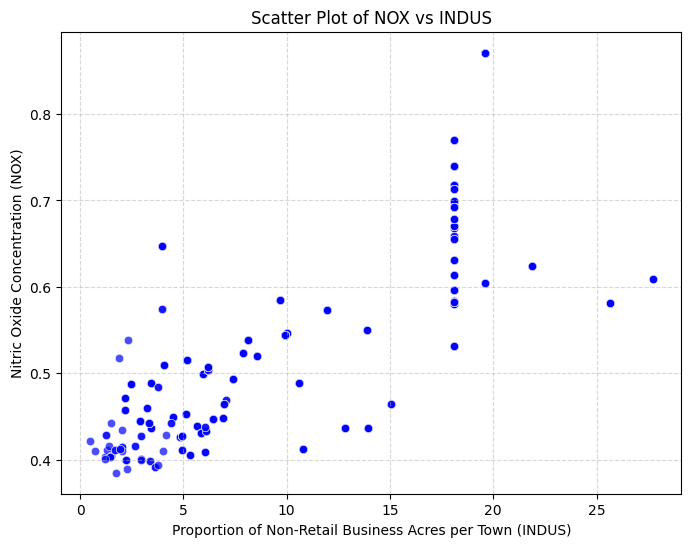

In [29]:
nox_column = "NOX"  
industrial_column = "INDUS"  

pyplot.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df[industrial_column], y=boston_df[nox_column], alpha=0.7, color="b")


pyplot.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.title("Scatter Plot of NOX vs INDUS")
pyplot.grid(True, linestyle="--", alpha=0.5)


pyplot.show()

# the points show a positive trend, it suggests that higher industrial land use is associated with higher nitric oxides concentration, which aligns with expectations

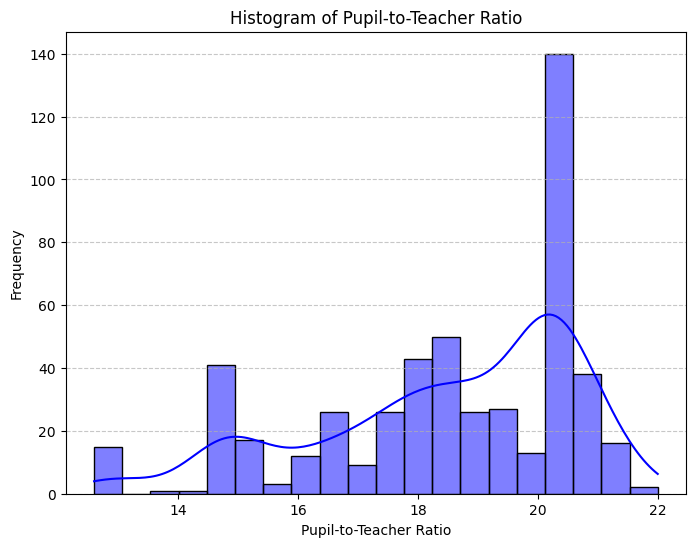

In [30]:
ptratio_column = "PTRATIO"  

pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df[ptratio_column], bins=20, kde=True, color="blue")

pyplot.xlabel("Pupil-to-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.title("Histogram of Pupil-to-Teacher Ratio")
pyplot.grid(axis="y", linestyle="--", alpha=0.7)

pyplot.show()

In [31]:
from scipy.stats import ttest_ind

charles_column = "CHAS"  
medv_column = "MEDV"  


group1 = boston_df[boston_df[charles_column] == 1][medv_column]  
group2 = boston_df[boston_df[charles_column] == 0][medv_column]  


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  


print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median home values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values.")

T-statistic: 3.1133, P-value: 0.0036
Reject the null hypothesis: There is a significant difference in median home values.


In [32]:
from scipy.stats import f_oneway


boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["≤35 years", "35-70 years", "≥70 years"])


group1 = boston_df[boston_df["AGE_group"] == "≤35 years"]["MEDV"]
group2 = boston_df[boston_df["AGE_group"] == "35-70 years"]["MEDV"]
group3 = boston_df[boston_df["AGE_group"] == "≥70 years"]["MEDV"]


f_stat, p_value = f_oneway(group1, group2, group3)


print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median home values across age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values across age groups.")

F-statistic: 36.4076, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in median home values across age groups.


In [33]:
from scipy.stats import pearsonr

nox_column = "NOX"  
industrial_column = "INDUS" 

corr_coeff, p_value = pearsonr(boston_df[nox_column], boston_df[industrial_column])


print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7637, P-value: 0.0000
Reject the null hypothesis: There is a significant correlation between NOX and INDUS.


In [34]:
import statsmodels.api as sm

# independent (predictor) and dependent (response) variable
X = boston_df["DIS"]  
y = boston_df["MEDV"]  
# Add constant to the model
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

# Interpretation:
p_value_dis = model.pvalues["DIS"]
if p_value_dis < alpha:
    print("Reject the null hypothesis: Distance to employment centers significantly impacts median home value.")
else:
    print("Fail to reject the null hypothesis: Distance to employment centers does not significantly impact median home value.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        12:42:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0